In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [109]:
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier , VotingClassifier

from sklearn.model_selection import GridSearchCV , cross_validate , RandomizedSearchCV , validation_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split, cross_validate
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier

In [80]:
from sklearn.preprocessing import LabelEncoder

In [66]:
df=pd.read_csv("bank.csv", sep=";")

In [67]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [68]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [70]:
df.shape

(4521, 17)

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [72]:
df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [73]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

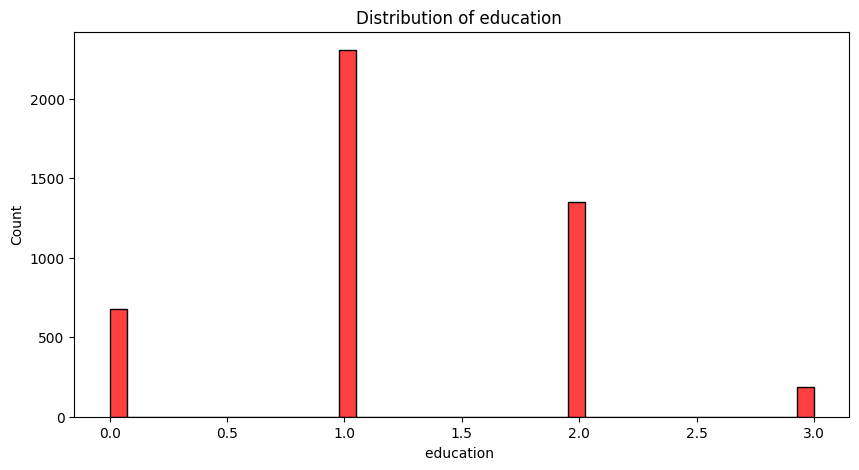

In [104]:
plt.figure(figsize=(10,5))
sns.histplot(df['education'],color='r',bins=40)
plt.title('Distribution of education ')
plt.xlabel('education ')
plt.ylabel('Count')
plt.show()

In [75]:
numerical_features = df.select_dtypes(include=[np.number])

In [76]:
correlation_matrix=numerical_features.corr()

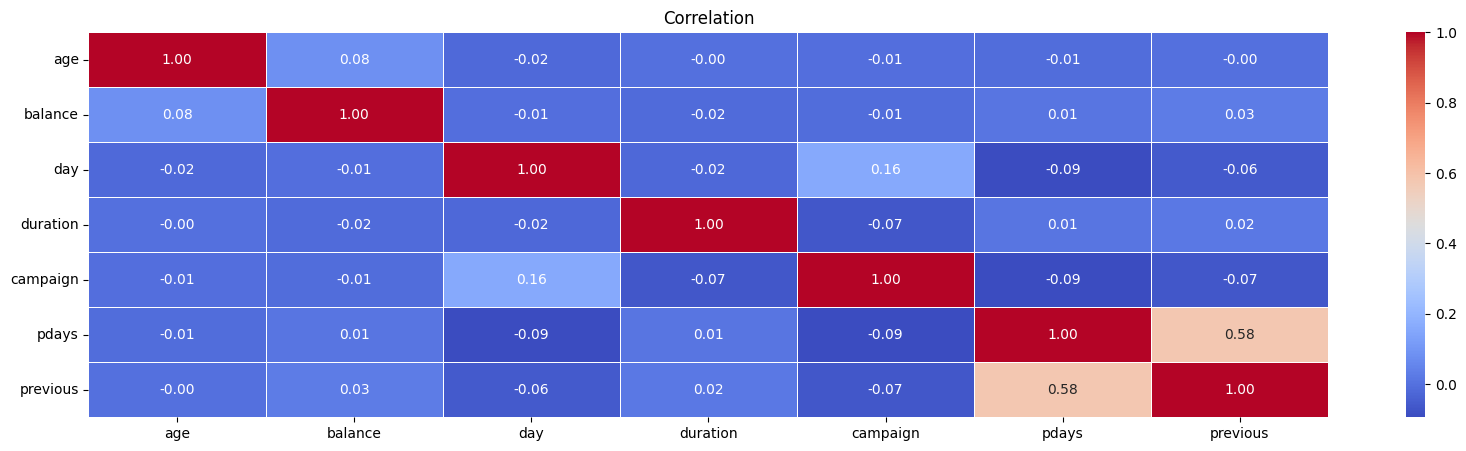

In [77]:
plt.figure(figsize=(20,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.6)
plt.title('Correlation')
plt.show()

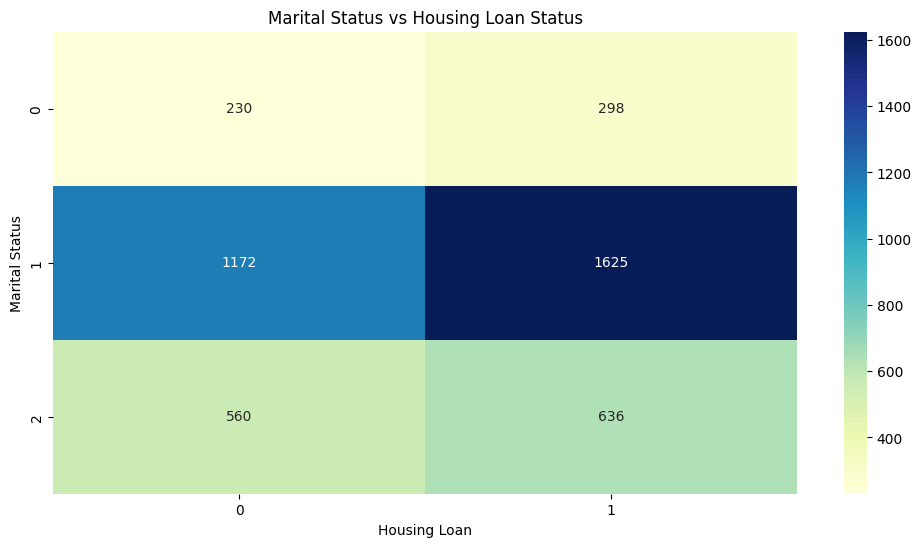

In [107]:
# Creating a crosstab for marital status and housing status
marital_housing_ct = pd.crosstab(df['marital'], df['housing'])

# Plotting the crosstab
plt.figure(figsize=(12, 6))
sns.heatmap(marital_housing_ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Marital Status vs Housing Loan Status')
plt.xlabel('Housing Loan')
plt.ylabel('Marital Status')
plt.show()

In [81]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [83]:
X = df.drop('y', axis=1)
y = df['y']

In [84]:
rf_model=RandomForestClassifier(random_state=20)

In [85]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 20,
 'verbose': 0,
 'warm_start': False}

In [86]:
cv_results = cross_validate(rf_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [87]:
cv_results['test_accuracy'].mean()


0.8986935669772802

In [90]:
cv_results['test_f1'].mean()

0.4075244016103052

In [89]:
cv_results['test_roc_auc'].mean()

0.9086391055878085

In [93]:
rf_param={"max_depth":[12,13,14],
          "max_features":[3,4,5],
          "n_estimators":[200,250],
          "min_samples_split":[3,4,5]}

In [94]:
best_grid=GridSearchCV(rf_model,rf_param,cv=5 ,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [95]:
best_grid.best_params_

{'max_depth': 13,
 'max_features': 4,
 'min_samples_split': 3,
 'n_estimators': 250}

In [96]:
rf_final=rf_model.set_params(**best_grid.best_params_, random_state=20).fit(X,y)

In [97]:
cv_results=cross_validate(rf_final, X,y ,cv=10 ,scoring=["accuracy","recall","f1"])

In [98]:
cv_results['test_accuracy'].mean()

0.8984723280392272

In [100]:
cv_results['test_recall'].mean()


0.3012699564586357

In [99]:
cv_results['test_f1'].mean()

0.40516218984573416

In [105]:
X = df.drop('y', axis=1)
y = df['y']

In [111]:
gbm_mod=LGBMClassifier(random_state=17)

In [112]:
cv_results = cross_validate(gbm_mod, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

[LightGBM] [Info] Number of positive: 416, number of negative: 3200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 3616, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115044 -> initscore=-2.040221
[LightGBM] [Info] Start training from score -2.040221
[LightGBM] [Info] Number of positive: 417, number of negative: 3200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 3617, number of used features: 16
[LightGBM] [Info] [binary:Bo

In [113]:
cv_results['test_accuracy'].mean()

0.8949349728646165

In [114]:
cv_results['test_f1'].mean()

0.43343693106892667

In [115]:
gbm_mod.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [121]:
lgbm_param={"learning_rate":[0.1],
           "max_depth":[8,10],
           "n_estimators":[100,150,200],
           "subsample":[0.5,0.4,0.7]}

In [122]:
lgbm_best_grid=GridSearchCV(gbm_mod,gbm_param,cv=5, n_jobs=-1,verbose=2).fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 521, number of negative: 4000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4521, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115240 -> initscore=-2.038300
[LightGBM] [Info] Start training from score -2.038300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [123]:
lgbm_best_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.5}

In [124]:
gbm_fnl=gbm_mod.set_params(**gbm_best_grid.best_params_ ,random_state=20 ).fit(X,y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 521, number of negative: 4000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4521, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115240 -> initscore=-2.038300
[LightGBM] [Info] Start training from score -2.038300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [125]:
cv_results=cross_validate(gbm_fnl,X,y,cv=5, scoring=["accuracy","recall","f1"])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 416, number of negative: 3200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 3616, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115044 -> initscore=-2.040221
[LightGBM] [Info] Start training from score -2.040221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [126]:
cv_results['test_accuracy'].mean()

0.8947132450007335

In [127]:
cv_results['test_recall'].mean()

0.3781501831501831